In [1]:
import sys
sys.path.append('/home/jhsia2/ragged')

In [2]:
import json
import numpy as np
import random
from file_utils import load_json, save_jsonl, load_jsonl, save_json
import requests
from bs4 import BeautifulSoup
import os
import numpy as np

# np.save()
root_dir = '/data/tir/projects/tir6/general/afreens/dbqa/data'
gold_dataset = []
for i in range(1,5):
    # gold_dataset = 
    gold_dataset += load_json(os.path.join(root_dir, f'bioasq/Task11BGoldenEnriched/11B{i}_golden.json'))['questions']
train_dataset = load_json(os.path.join(root_dir, 'bioasq/BioASQ-training11b/training11b.json'))
train_dataset = train_dataset['questions']
print(len(gold_dataset), len(train_dataset))

combined_dataset = gold_dataset + train_dataset
print(len(combined_dataset))

id2title = load_json(os.path.join(root_dir, 'corpus_files/pm_sec_id2title.json'))
# corpus = load_jsonl('/data/tir/projects/tir6/general/afreens/dbqa/data/bioasq/complete_medline_corpus_jsonl/complete_medline_corpus.jsonl')

# id2title = {}
# for c in corpus:
#     docid, sec = c['id'].split('_')
#     if (int)(sec) == 0:
#         title = c['contents']
#         id2title[docid] = title


reading from /data/tir/projects/tir6/general/afreens/dbqa/data/bioasq/Task11BGoldenEnriched/11B1_golden.json
reading from /data/tir/projects/tir6/general/afreens/dbqa/data/bioasq/Task11BGoldenEnriched/11B2_golden.json
reading from /data/tir/projects/tir6/general/afreens/dbqa/data/bioasq/Task11BGoldenEnriched/11B3_golden.json
reading from /data/tir/projects/tir6/general/afreens/dbqa/data/bioasq/Task11BGoldenEnriched/11B4_golden.json
reading from /data/tir/projects/tir6/general/afreens/dbqa/data/bioasq/BioASQ-training11b/training11b.json
327 4719
5046
reading from /data/tir/projects/tir6/general/afreens/dbqa/data/corpus_files/pm_sec_id2title.json


In [32]:
# questions_categorized = {}
questions_categorized = []
num_yes = []
# doc_par_ids = set()

print(len(combined_dataset))
for i, q in enumerate(combined_dataset):
    # if (i%1000 == 0):
    #     print('st', i)
    if 'exact_answer' not in q.keys():
        continue
    questions_categorized.append(q['type'])
    # questions_categorized[q['id']] = q['type']
    # if q['type']== 'yesno':
    #     num_yes.append(0 if q['exact_answer']=='no' else
    

#     qid = q['id']
#     # sample_dict = {'id': qid, \
#     #                'input': q['body'],\
#     #                'output': []
#     #                }
    
# #     answer_set = set()
#     if type(q['exact_answer']) == list:
#         for a_set in q['exact_answer']:
#             if (type(a_set) == list):
#                 for a in a_set:
#                     answer_set.add(a)
#             else:
#                 answer_set.add(a_set)
#     else:
#         answer_set.add(q['exact_answer'])
        
#     for a in answer_set:
#         sample_dict['output'].append({'answer': a})

#     num_prov = 0
#     for s in q['snippets']:
        
#         docid = s['document'].split('pubmed/')[1]
#         beginSec = s['beginSection']
#         # title = s['title']
#         title = id2title.get(docid, None)
#         if title:
#             num_prov +=1 
#             sample_dict['output'].append({'provenance': [{
#                             'pmid': docid, \
#                             'section': beginSec,\
#                             'title': title}]})
#         # sample_dict['output'].append({'provenance': [{'docid': docid, \
#         #                 'section': beginSec}]})
#     # if (i%1000 == 0):
#     #     print('end', i)
#     prov_docs.append(sample_dict)
#     # if num_prov == 0:
#     #     print('qid missing provs', qid)
#         # doc_ids.add((int)(docid))
# print(len(prov_docs))


5046


In [14]:
np.average(num_yes)

0.7391304347826086

In [8]:
from file_utils import load_json, save_jsonl, load_jsonl, save_json
save_json(questions_categorized, os.path.join(root_dir, 'questions_categorized/bioasq_questions_categorized.json'))

writing to /data/tir/projects/tir6/general/afreens/dbqa/data/questions_categorized/bioasq_questions_categorized.json


In [9]:
save_json(questions_categorized, os.path.join(root_dir, 'questions_categorized/complete_bioasq_questions_categorized.json'))

writing to /data/tir/projects/tir6/general/afreens/dbqa/data/questions_categorized/complete_bioasq_questions_categorized.json


In [38]:
import matplotlib.pyplot as plt

def plot_question_distribution(categorized_questions):
# Count the number of questions in each category
    counts = {key: value for key, value in categorized_questions.items()}

    # Categories and their counts
    categories = list(counts.keys())
    values = list(counts.values())

    # Plotting
    plt.bar(categories, values)
    plt.xlabel('Question Categories')
    plt.ylabel('Number of Questions')
    plt.title('Number of Questions per Category')
    plt.show()


In [33]:
questions_categorized

['yesno',
 'factoid',
 'list',
 'list',
 'factoid',
 'factoid',
 'yesno',
 'yesno',
 'yesno',
 'yesno',
 'list',
 'factoid',
 'list',
 'yesno',
 'yesno',
 'list',
 'yesno',
 'yesno',
 'yesno',
 'yesno',
 'factoid',
 'yesno',
 'list',
 'yesno',
 'yesno',
 'yesno',
 'list',
 'factoid',
 'yesno',
 'factoid',
 'yesno',
 'list',
 'list',
 'factoid',
 'factoid',
 'yesno',
 'list',
 'factoid',
 'factoid',
 'yesno',
 'yesno',
 'yesno',
 'list',
 'factoid',
 'factoid',
 'factoid',
 'yesno',
 'factoid',
 'factoid',
 'factoid',
 'factoid',
 'yesno',
 'yesno',
 'factoid',
 'yesno',
 'factoid',
 'list',
 'list',
 'yesno',
 'factoid',
 'factoid',
 'list',
 'factoid',
 'factoid',
 'yesno',
 'yesno',
 'yesno',
 'list',
 'yesno',
 'factoid',
 'factoid',
 'list',
 'yesno',
 'yesno',
 'yesno',
 'factoid',
 'yesno',
 'factoid',
 'list',
 'yesno',
 'factoid',
 'factoid',
 'factoid',
 'yesno',
 'factoid',
 'yesno',
 'factoid',
 'yesno',
 'factoid',
 'yesno',
 'factoid',
 'factoid',
 'yesno',
 'list',
 'yesn

In [37]:
Counter(questions_categorized)

Counter({'factoid': 1515, 'yesno': 1357, 'list': 965})

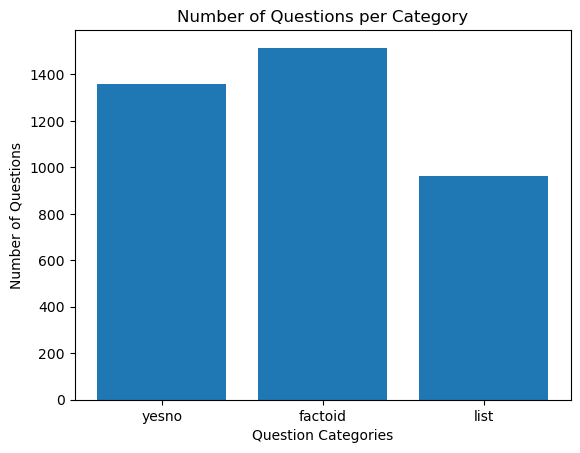

In [39]:
from collections import Counter
plot_question_distribution(Counter(questions_categorized))